In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np

In [3]:
df = pd.DataFrame({
    'Model': ['LR','xgboost','RandomForest','Adaboost','LightGBM'],
    '정확도': [0.6760, 0.6700,0.7244,0.7100,0.700],
    '정밀도': [0.6402, 0.6500, 0.6950, 0.6900, 0.6700],
    '재현율': [0.8036, 0.7500, 0.7998, 0.7500, 0.7800],
    'f1': [0.7127, 0.7000, 0.7437, 0.7200, 0.7200],
    'auc': [0.6760, 0.6700, 0.7244, 0.7100, 0.7000]})

In [67]:
df

,Model,정확도,정밀도,재현율,f1,auc
0,LR,0.6760,0.6402,0.8036,0.7127,0.6760
1,xgboost,0.6700,0.6500,0.7500,0.7000,0.6700
2,RandomForest,0.7244,0.6950,0.7998,0.7437,0.7244
3,Adaboost,0.7100,0.6900,0.7500,0.7200,0.7100
4,LightGBM,0.7000,0.6700,0.7800,0.7200,0.7000


In [68]:
df1 = pd.DataFrame({
    'Feature' : ['정확도','정밀도','재현율','f1','auc'],
    'LR' : [0.6760, 0.6402,0.8036,0.7127,0.6760],
    'xgboost' : [0.67,0.65,0.75,0.70,0.67],
    'RandomForest' : [0.7244,0.6950,0.7998,0.7437,0.7244],
    'Adaboost' : [0.71,0.69,0.75,0.72,0.71],
    'LightGBM' : [0.7,0.67,0.78,0.72,0.7]
})

In [69]:
df1

,Feature,LR,xgboost,RandomForest,Adaboost,LightGBM
0,정확도,0.6760,0.67,0.7244,0.71,0.70
1,정밀도,0.6402,0.65,0.6950,0.69,0.67
2,재현율,0.8036,0.75,0.7998,0.75,0.78
3,f1,0.7127,0.70,0.7437,0.72,0.72
4,auc,0.6760,0.67,0.7244,0.71,0.70


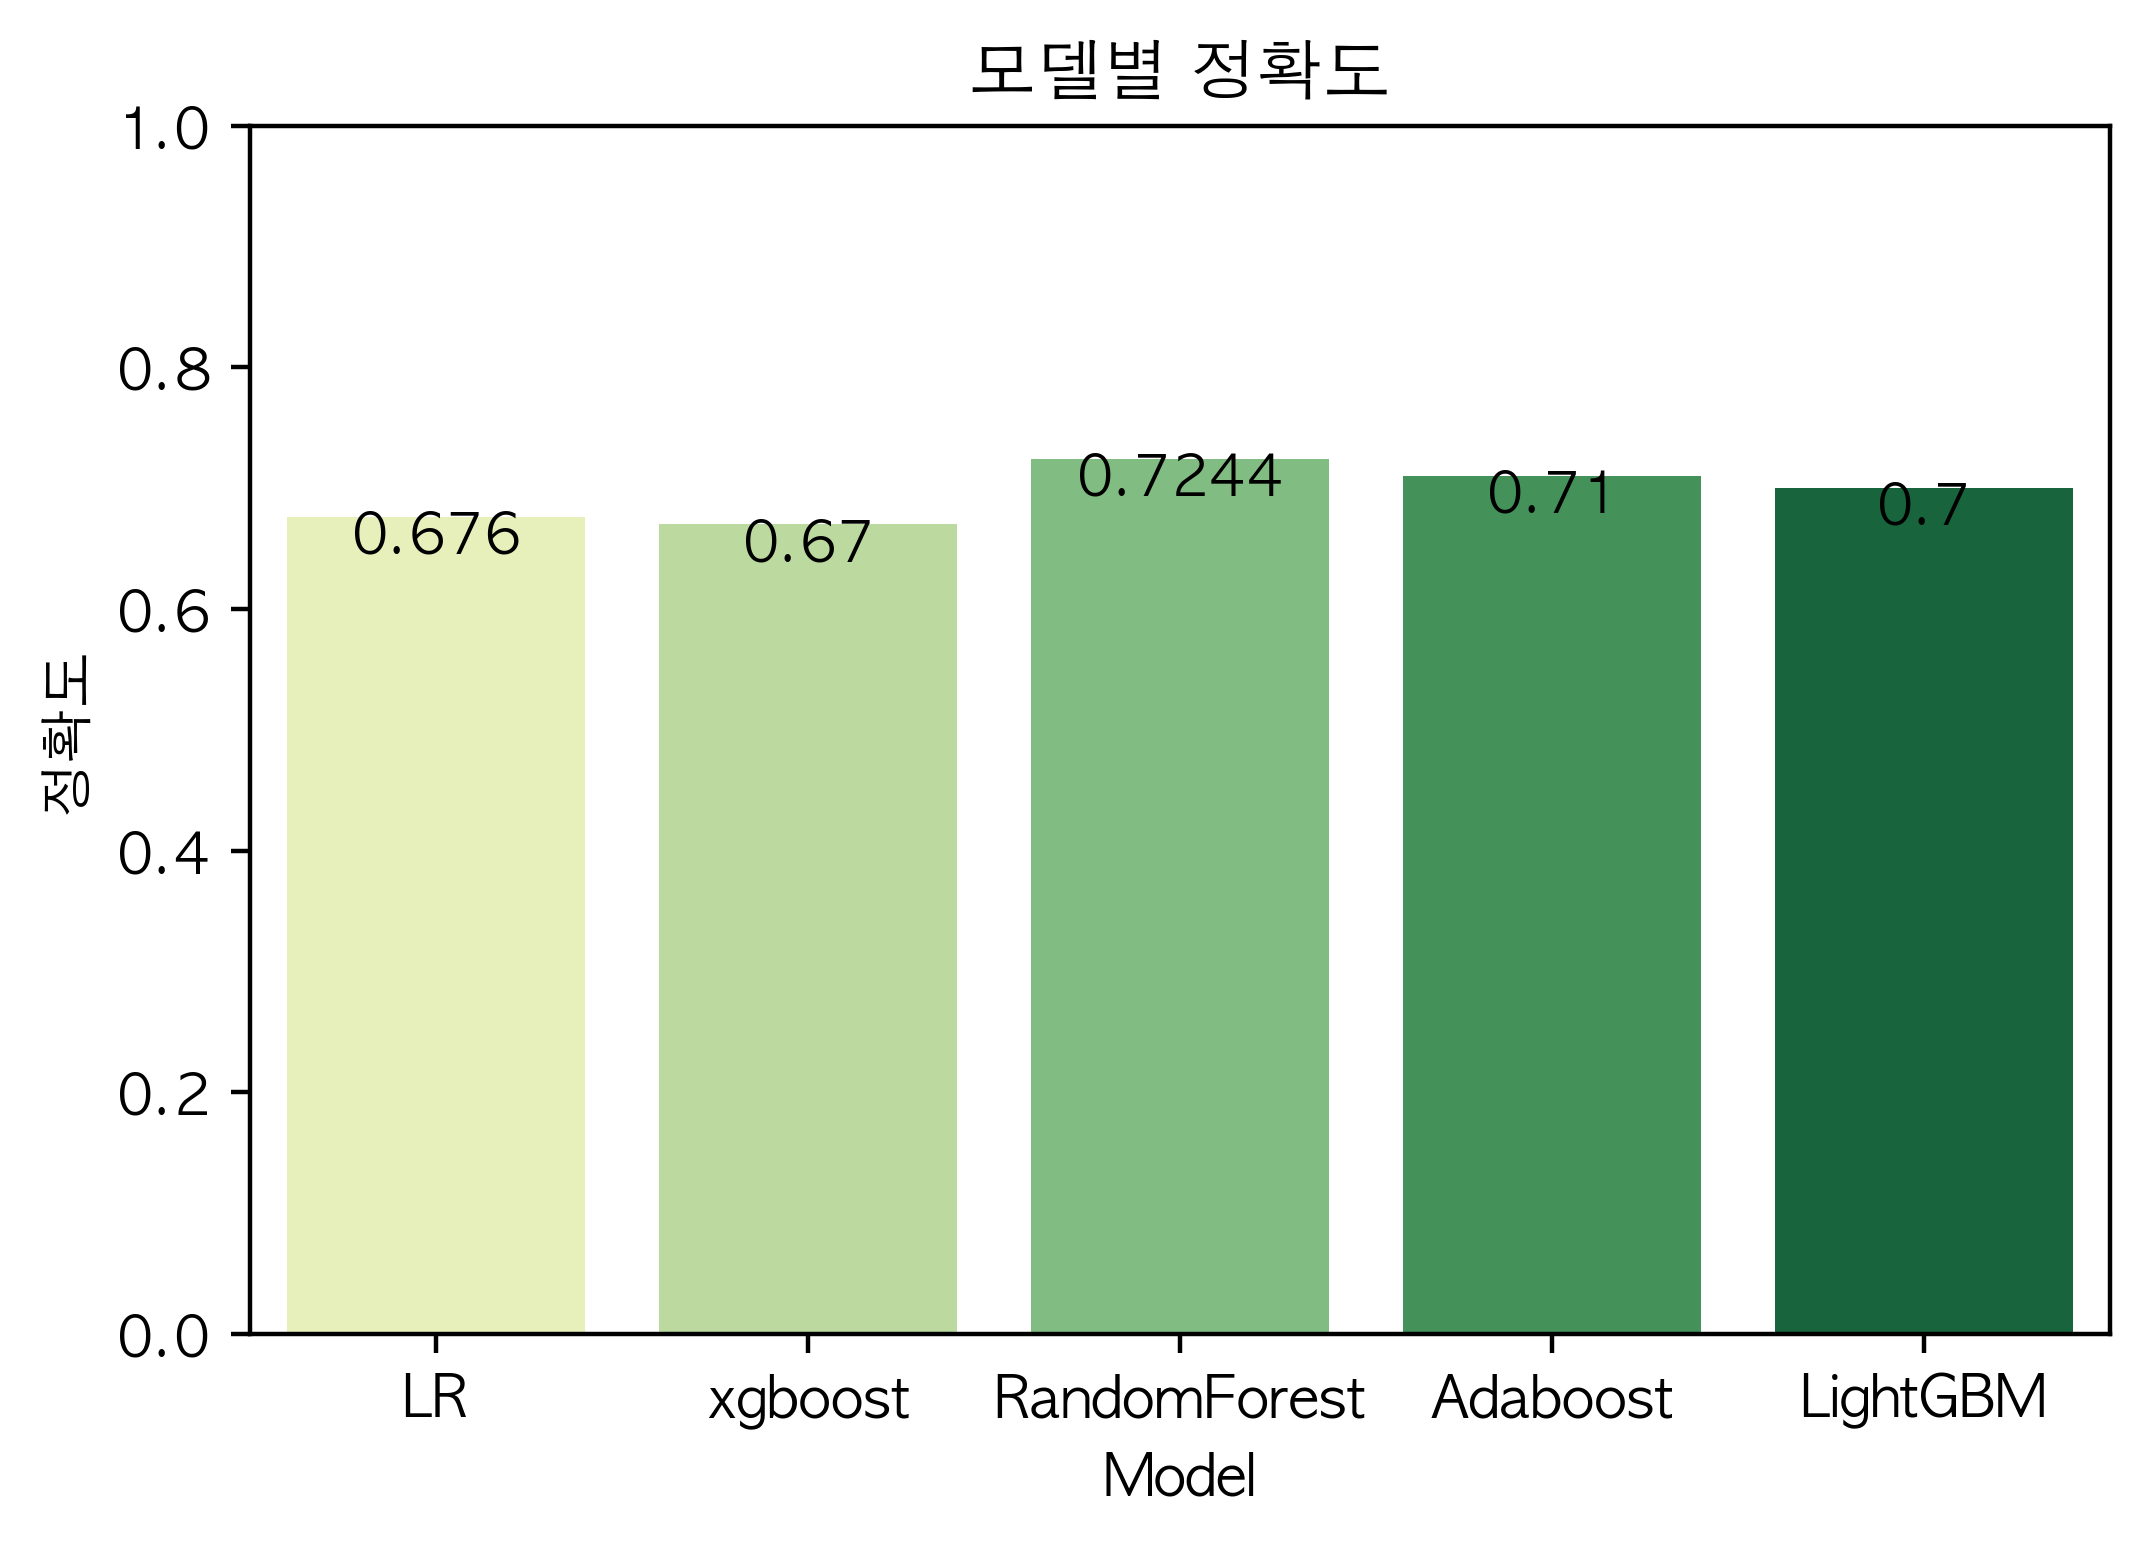

In [59]:
ax = sns.barplot(x=df['Model'], y=df['정확도'],palette="YlGn")
plt.title('모델별 정확도')
ax.set(ylim=(0,1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height - 0.03, height, ha="center")
plt.show(ax)

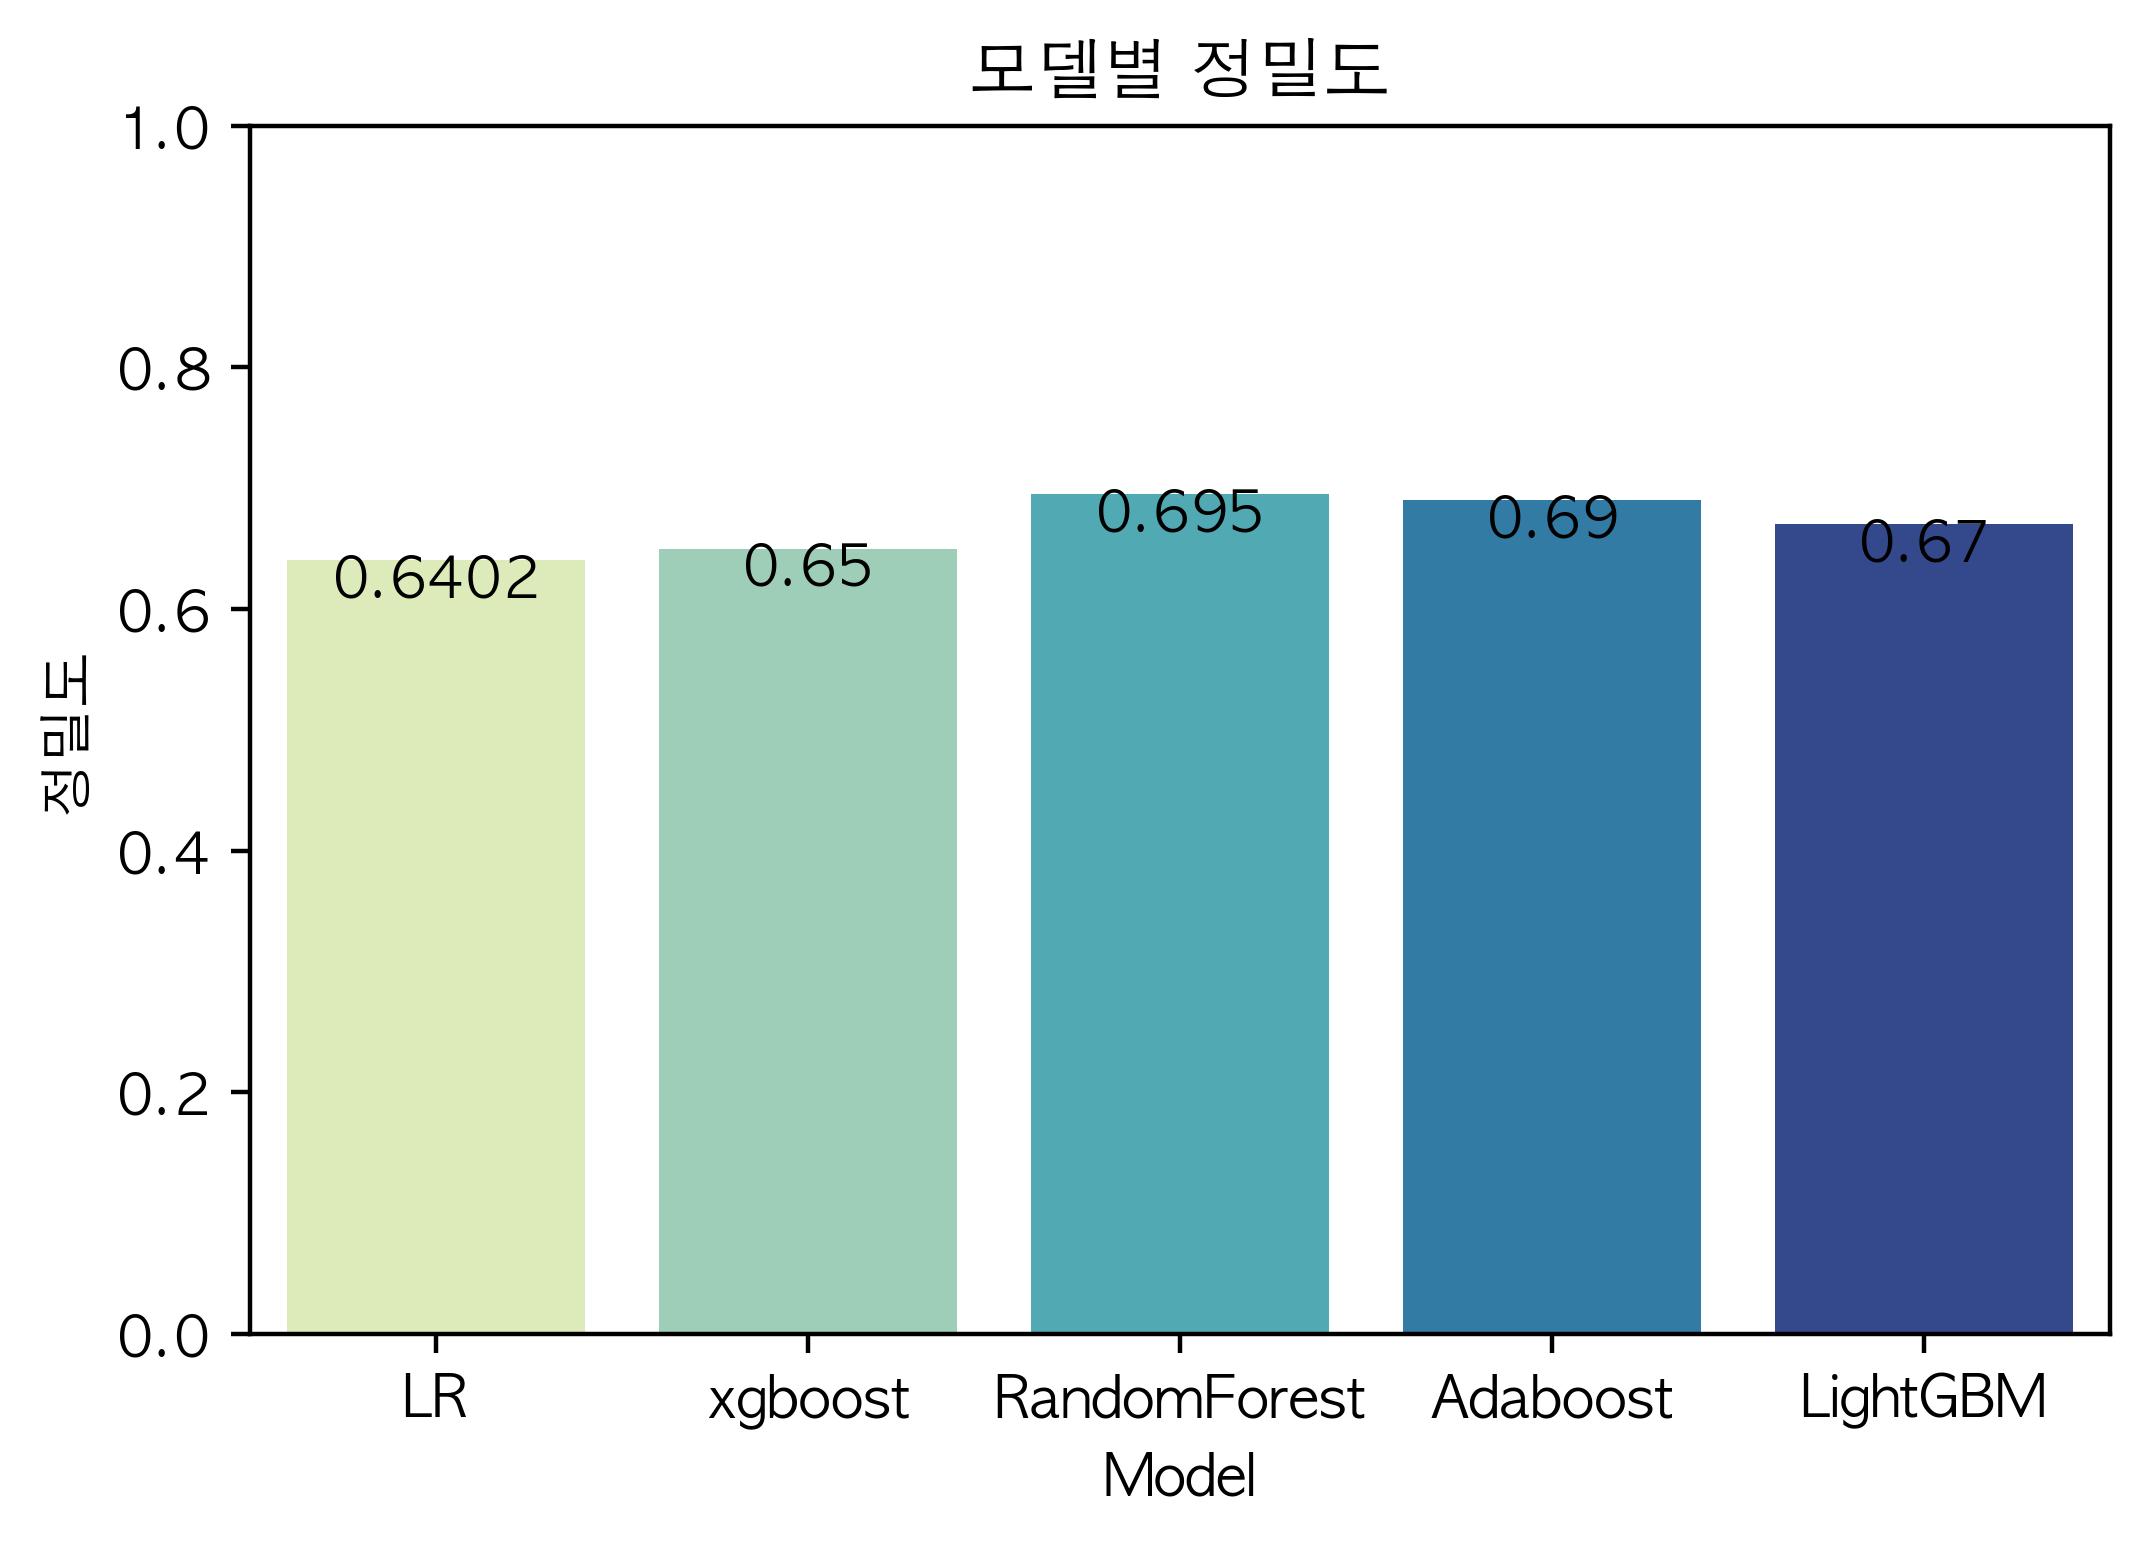

In [60]:
ax = sns.barplot(x=df['Model'], y=df['정밀도'],palette="YlGnBu")
plt.title('모델별 정밀도')
ax.set(ylim=(0,1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height - 0.03, height, ha="center")
plt.show(ax)

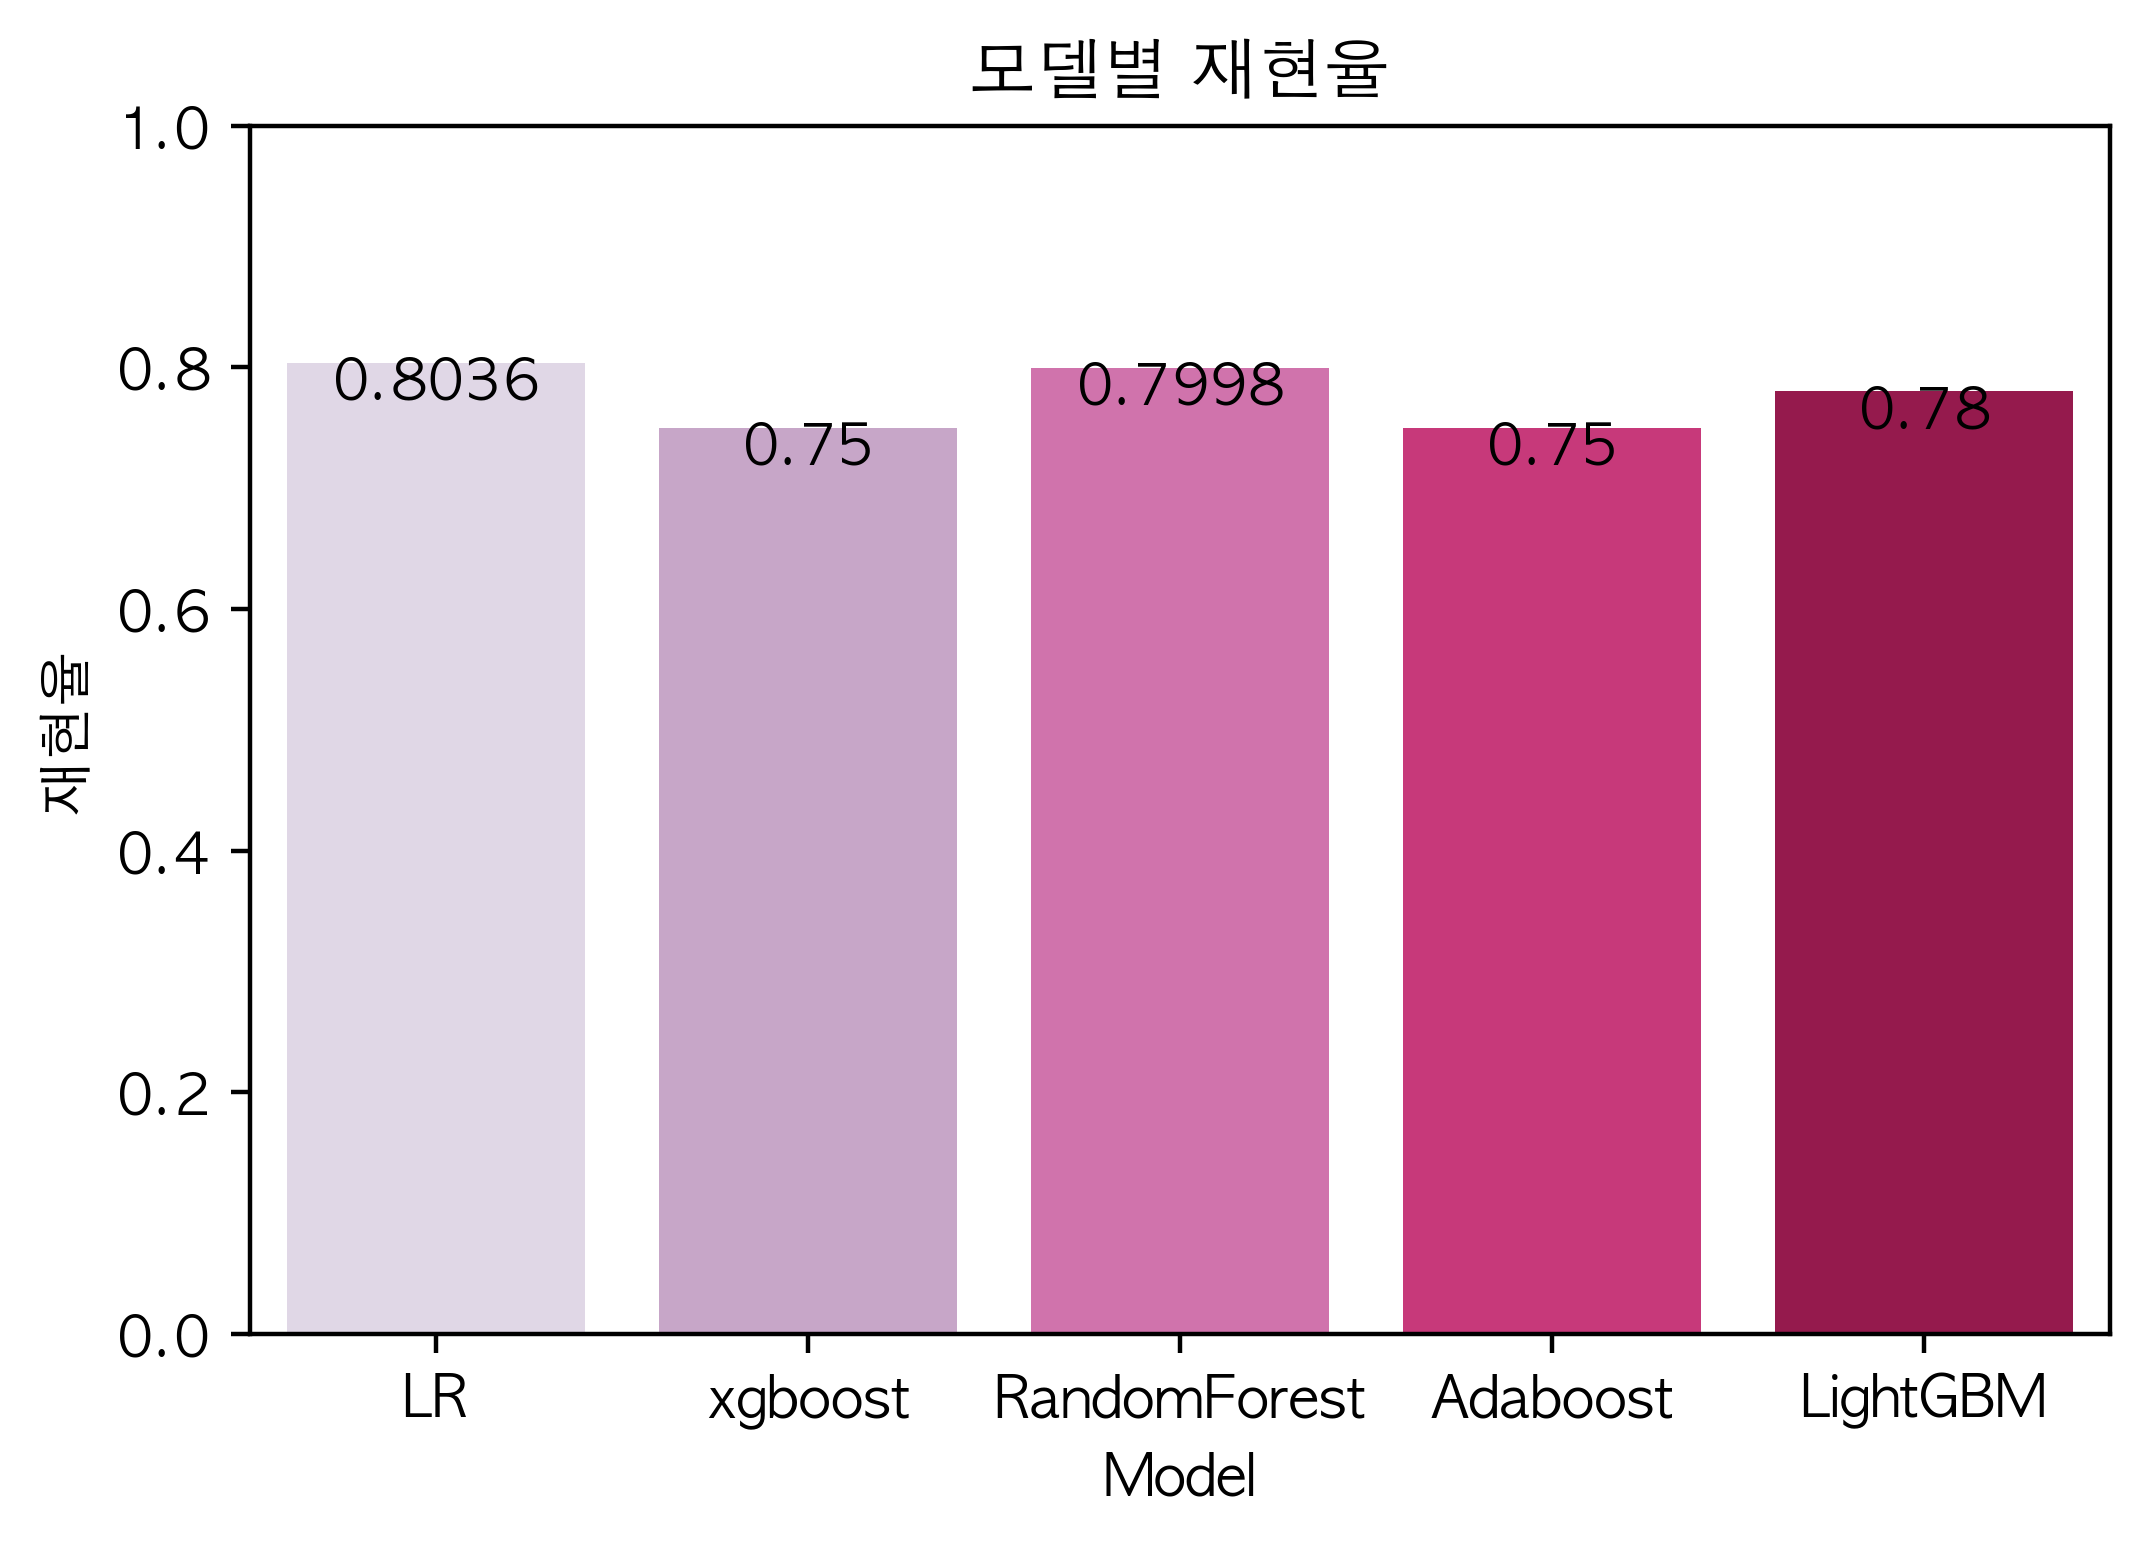

In [62]:
ax = sns.barplot(x=df['Model'], y=df['재현율'],palette="PuRd")
plt.title('모델별 재현율')
ax.set(ylim=(0,1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height - 0.03, height, ha="center")
plt.show(ax)

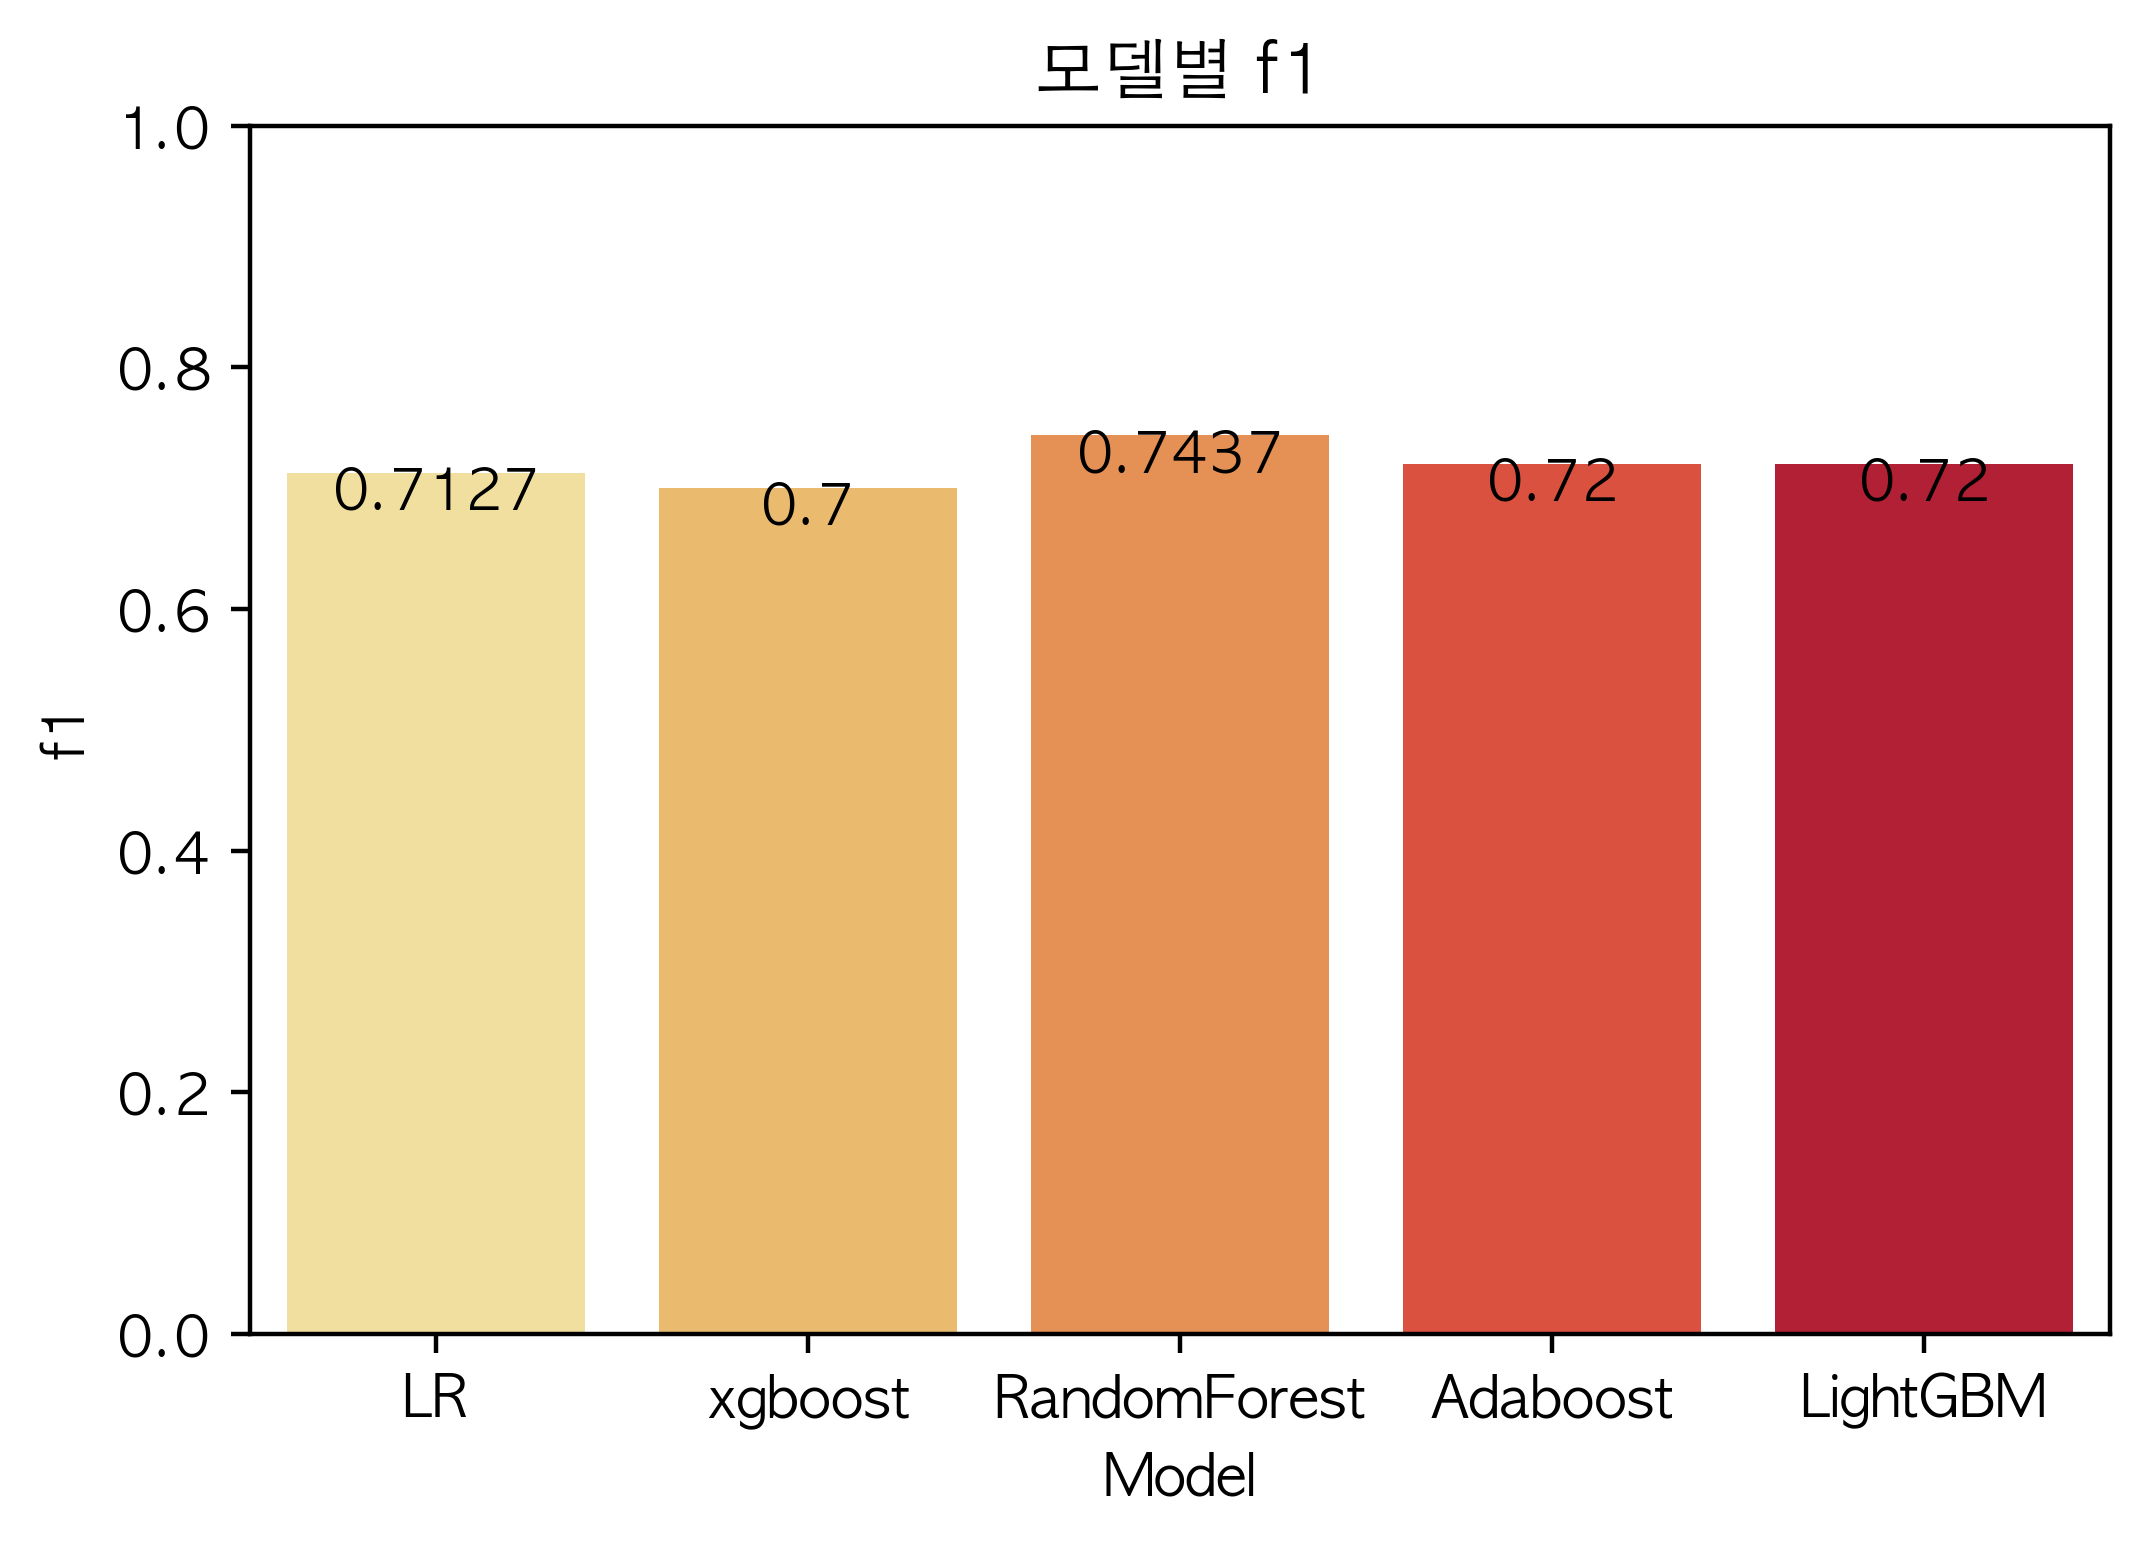

In [63]:
ax = sns.barplot(x=df['Model'], y=df['f1'],palette="YlOrRd")
plt.title('모델별 f1')
ax.set(ylim=(0,1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height - 0.03, height, ha="center")
plt.show(ax)

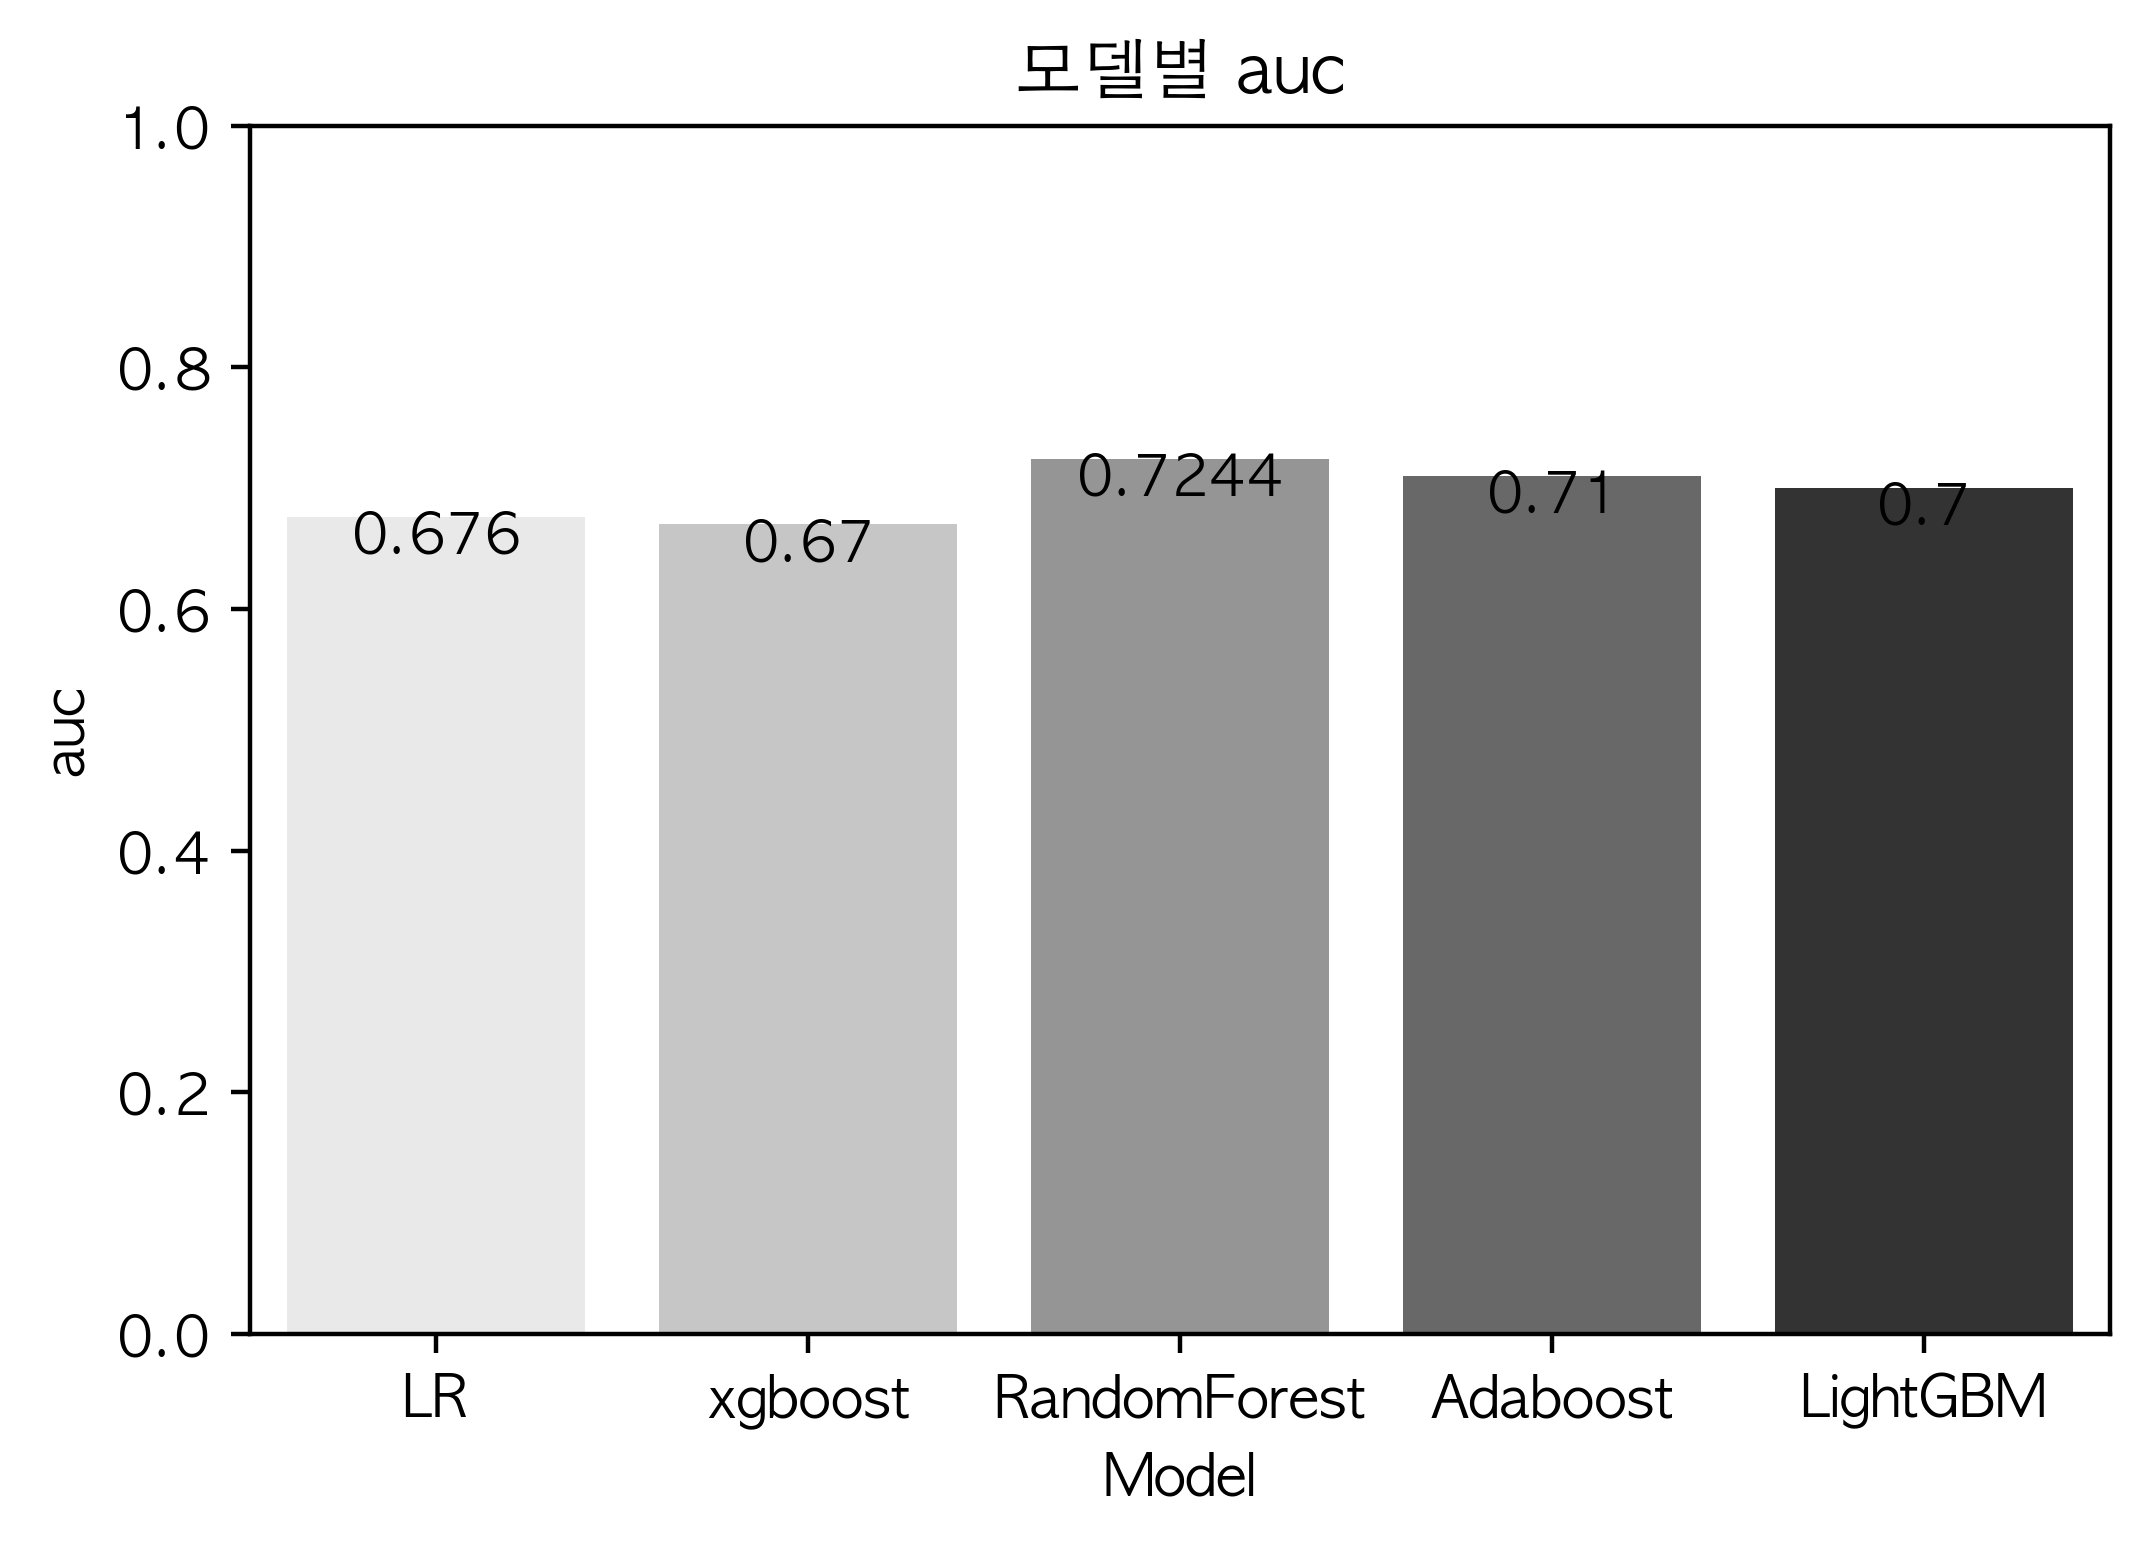

In [64]:
ax = sns.barplot(x=df['Model'], y=df['auc'],palette="Greys")
plt.title('모델별 auc')
ax.set(ylim=(0,1))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height - 0.03, height, ha="center")
plt.show(ax)

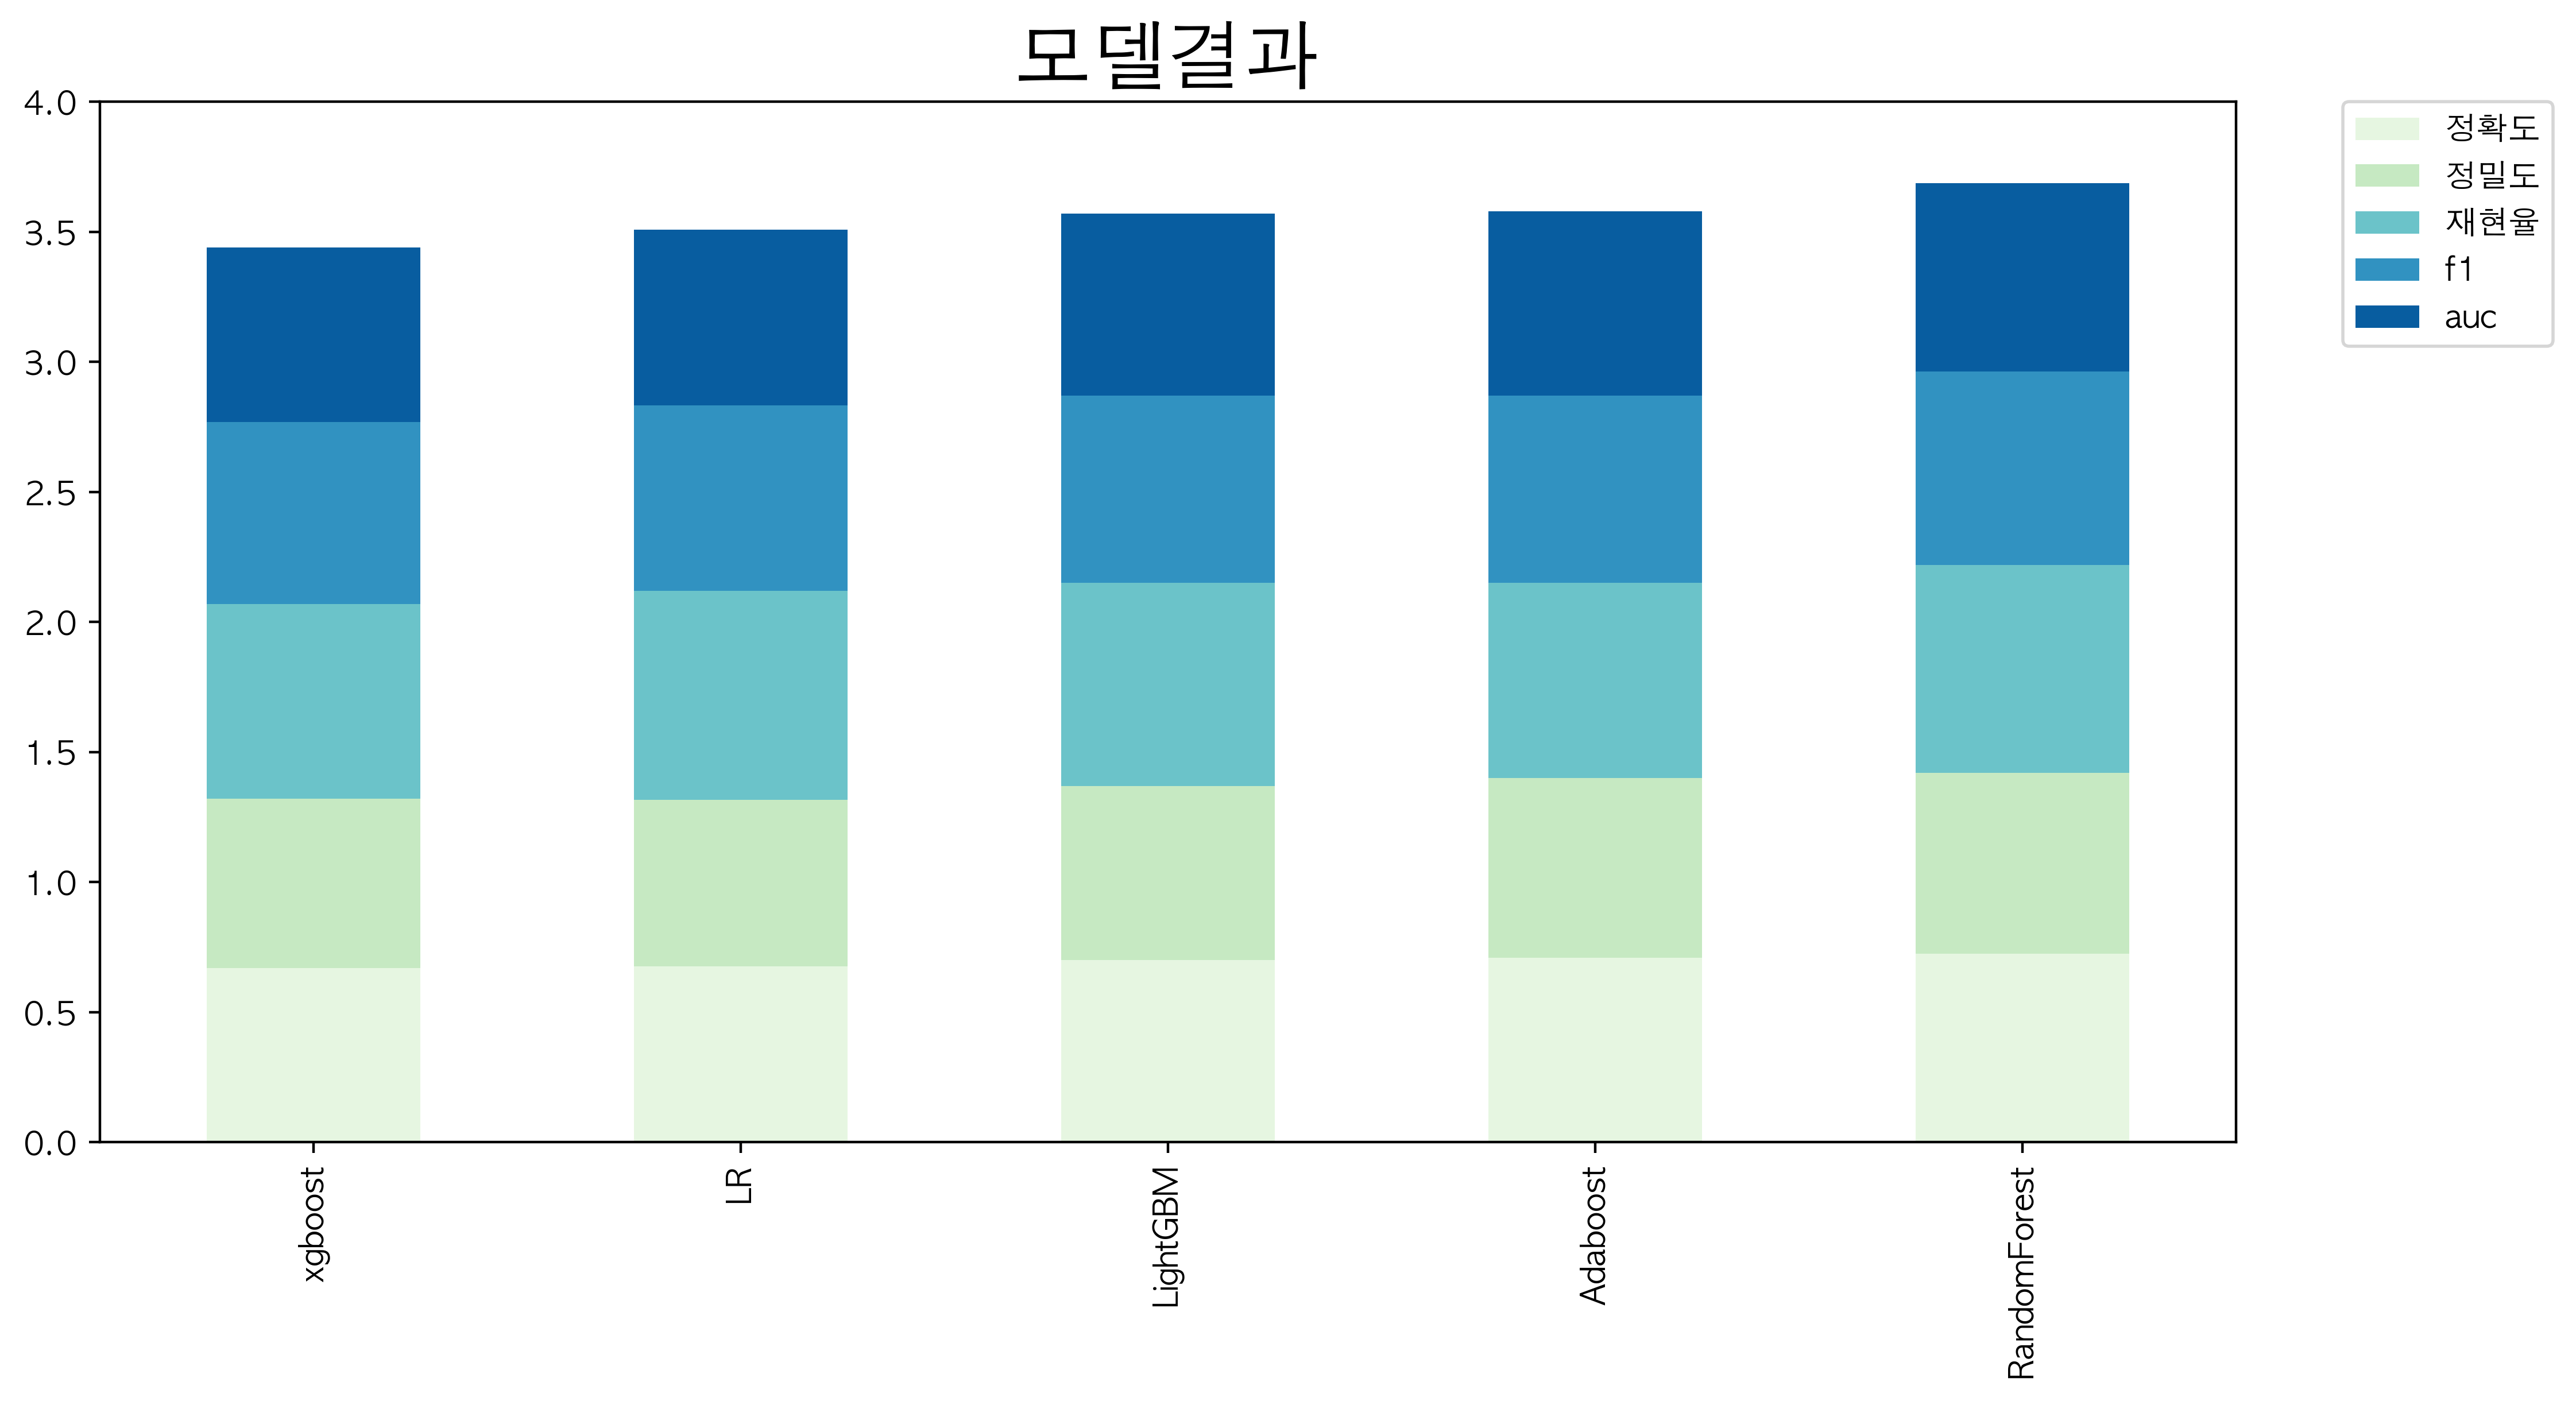

In [88]:
from matplotlib.colors import ListedColormap

ax = df1.set_index('Feature')\
  .reindex(df1.set_index('Feature').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))
plt.title('모델결과',fontsize=24)
ax.set(ylim=(0,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show(ax)


LR 모델 오차행렬

오차행렬:
 [[126785 104373]
 [ 45410 185747]]

정확도: 0.6760
정밀도: 0.6402
재현율: 0.8036
F1: 0.7127
AUC: 0.6760

In [90]:
# 임계값 0.44
cf_matrix = np.array([[126785, 104373], 
                   [45410, 185747]])

In [103]:
# 임계값 0.5
cf_matrix1 = np.array([[148202,82956],
                    [69623,161534]])

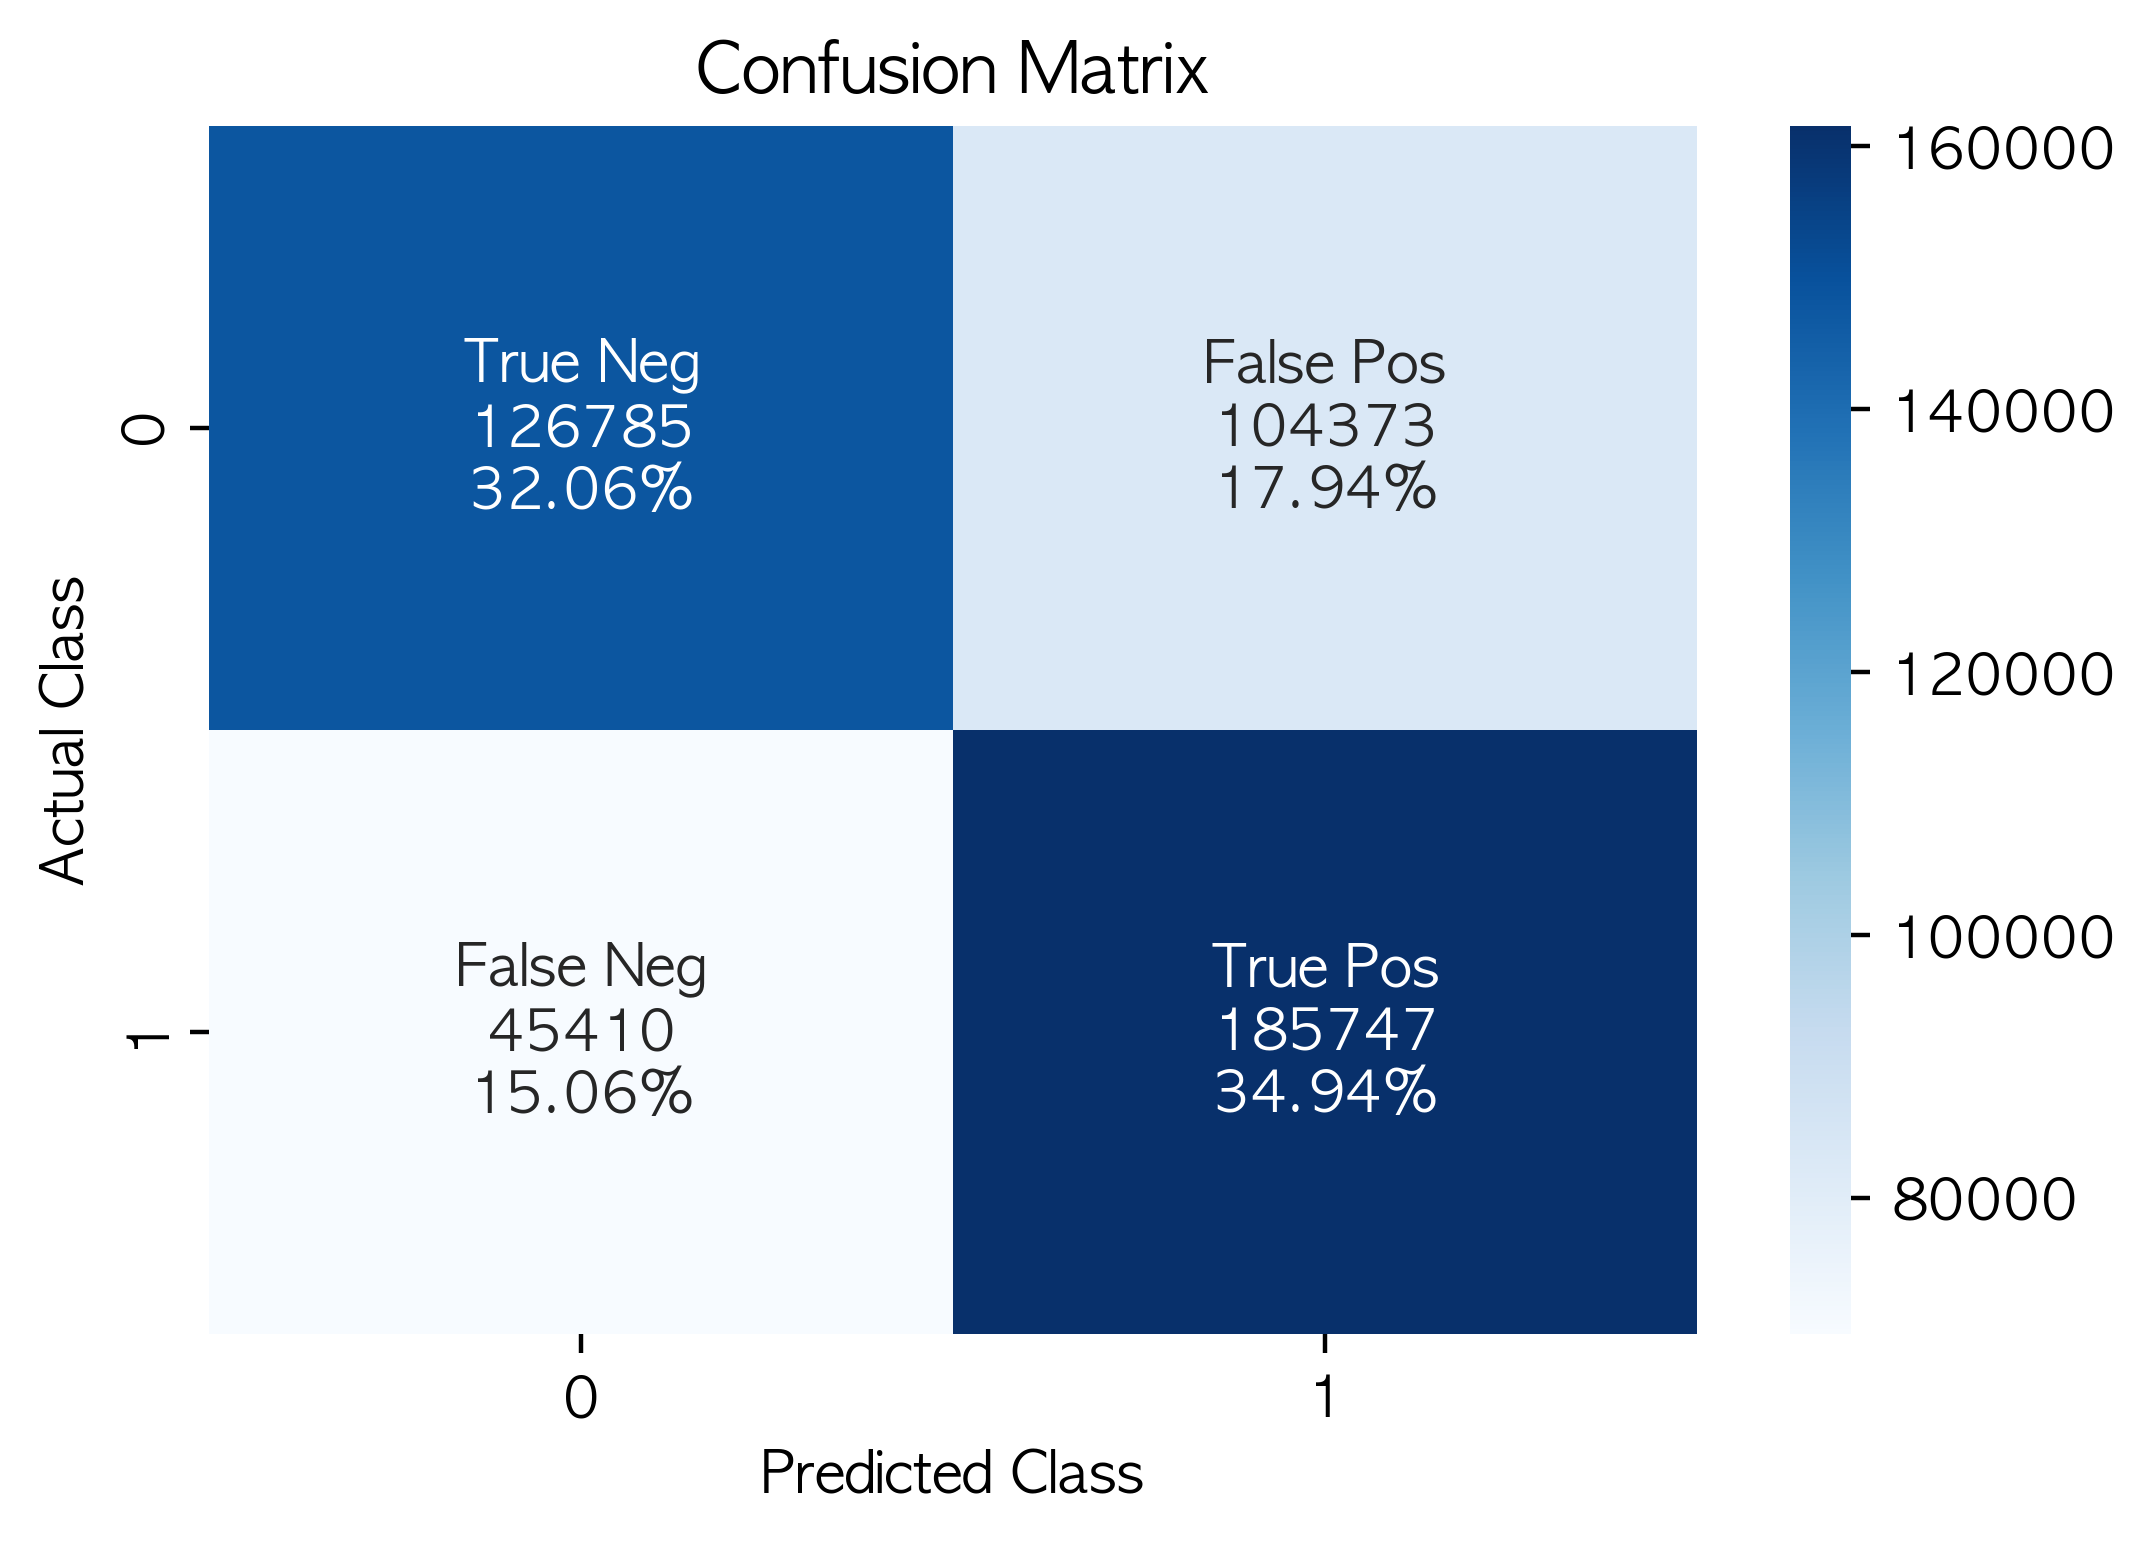

In [111]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show(ax)
